In [9]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pickle

In [10]:
def IL_show(IL_dict):
    formatted_dict = deepcopy(IL_dict)
    for water_len in formatted_dict.keys():
        formatted_dict[water_len] = np.mean(formatted_dict[water_len])
    left = np.array(list(formatted_dict.keys()))
    height = np.array(list(formatted_dict.values()))
    plt.plot(left, height)

In [7]:
def IL_show_from_pickle(IL_dict_pickle):
    with open(IL_dict_pickle, 'rb') as f:
        IL_dict = pickle.load(f)
    IL_show(IL_dict)

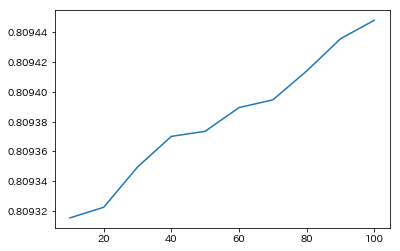

In [8]:
import sys
IL_show_from_pickle('../result/IL_results100.pkl')